**Heart disease classification**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/processed.cleveland.data.txt', sep=",", names= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

In [ ]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


  3 age: age in years

  4 sex: sex (1 = male; 0 = female)

  9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

   10 trestbps: resting blood pressure (in mm Hg on admission to the
        hospital)

   12 chol: serum cholestoral in mg/dl

   16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

   19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria

   32 thalach: maximum heart rate achieved

  38 exang: exercise induced angina (1 = yes; 0 = no)

  40 oldpeak = ST depression induced by exercise relative to rest

  41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping

44 ca: number of major vessels (0-3) colored by flourosopy

51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing

In [ ]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

There are categorical variables that are encoded as integers. We need later to do a one-hot encoding for these variables. Variables 'thal' and 'ca' have object types. We need to check them.
Let's check now missing values.

In [ ]:
data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

The variable 'ca' contains a question mark.

In [ ]:
data['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

**MISSING VALUES**

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We have no missing values on our data. The only issue we have till now is the question marks in two features. Let's check how many rows are affected ?

In [ ]:
data[data['thal'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [ ]:
data[data['ca'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


We have in total only 6 rows containing the question mark. We can already remove them. It's 6 rows out of 302: 2% of the whole dataset. It's okay.

In [ ]:
# We remove rows with ? on both columns ca and thal
df = data[~(data['ca'] == '?')]            #df= data.drop(data[data['ca'] == '?'].index)
df = df[~(df['thal'] == '?')]

In [ ]:
len(df)

297

Now we have a dataset with 14 columns and 302 row-patient.

**Create the target variable and the dependent variables**

In [ ]:
# X is the whole dataset but the target variable
X = df.drop('target', axis=1).copy()

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
y = df['target'].copy()

In [ ]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: target, dtype: int64

In [ ]:
y.values

array([0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0,
       1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3, 1,
       1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4, 3,
       1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1, 0, 1,
       0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 4, 2, 2,
       1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 4, 2, 0, 0, 1,
       0, 2, 2, 1, 0, 3, 1, 1, 2, 3, 1])

The target variable contains the value 0 which means the patient is not sick.
The other values give information about the types of heart disease. Since we are only interested in the classification of being sick or not, we are going to convert all values greater than 0 to 1 so that we have a binary classification.

In [ ]:
index_y_str_positiv =  y > 0 # get all the indices of observations with target different to 0
y[index_y_str_positiv] = 1
y.head(15)

0     0
1     1
2     1
3     0
4     0
5     0
6     1
7     0
8     1
9     1
10    0
11    0
12    1
13    0
14    0
Name: target, dtype: int64

**ONE-HOT ENCODING**

We have many categorical variables. Let's try apply one-hot encoding on them to be able to apply our scikit learn models on them.
We apply one-hot encoding only to variables with more than 2 categories.

In [ ]:
X.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
#cp, restecg, slope, ca, thal
X_encoded = pd.get_dummies(X, columns = ['cp','restecg','slope','ca','thal'])
X_encoded.head(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,1,0,0,1,0,0,0,1,0,0
5,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0,1,...,1,0,0,1,0,0,0,1,0,0
6,62.0,0.0,140.0,268.0,0.0,160.0,0.0,3.6,0,0,...,0,0,1,0,0,1,0,1,0,0
7,57.0,0.0,120.0,354.0,0.0,163.0,1.0,0.6,0,0,...,1,0,0,1,0,0,0,1,0,0
8,63.0,1.0,130.0,254.0,0.0,147.0,0.0,1.4,0,0,...,0,1,0,0,1,0,0,0,0,1
9,53.0,1.0,140.0,203.0,1.0,155.0,1.0,3.1,0,0,...,0,0,1,1,0,0,0,0,0,1


**Building a Classification Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state= 42)

#create a decision tree and fit it to the training data

clf_dt = DecisionTreeClassifier(random_state= 42)
clf_dt = clf_dt.fit(X_train, y_train)

In [ ]:
plt.figure(figsize= (15, 7.5))
plot_tree(clf_dt,
          filled= True,
          rounded= True,
          class_names= ["No HD", "Yes HD"],
          feature_names =X_encoded.columns)

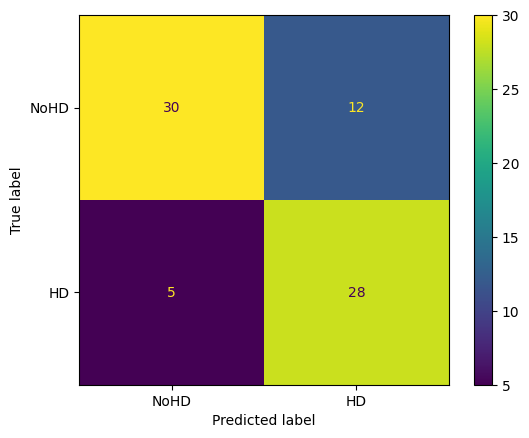

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf_dt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels =[0, 1] )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= ['NoHD', 'HD'])

disp.plot()
plt.show()

From the confusion matrix, we can see that out of 42 people who are not sick, 30 have been correctly classified(**71%**) It means we have 12 False positive people. Out of 33 people who were sick, 28 were correctly classified (**87.5%**).
Our model is pretty good but it is maybe overfitting.

Decision trees are known for being overfit to the training dataset and there are plenty of parameters like max_depth or min_samples that are designed to reduce overfitting. However, prunning a tree with **cost complexity pruning** can simplify the whole process of finding a smaller tree that improves the accuracy with the test dataset.

pruning a descisiontree is all about finding the right value for the pruning parameter, **alpha** which controls how little or how much pruning happens. One way to find the optimal value for **alpha** is to plot the accuracy of the tree as a function of different values. We'll do this for both the training dataset and the testing dataset.

First let's extract different of alpha that are available for this tree and build a pruned tree for each value of alpha.

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) #determine values for alpha
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value for alpha because it would prune all leaves, leaving us with only a root instead of a tree

clf_dts = [] # create an array that we will put decision trees into

#now create one decisiontree per value for alpha and store it in the array

for ccp_alpha in ccp_alphas :
  clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
  clf_dt.fit(X_train, y_train)
  clf_dts.append(clf_dt)

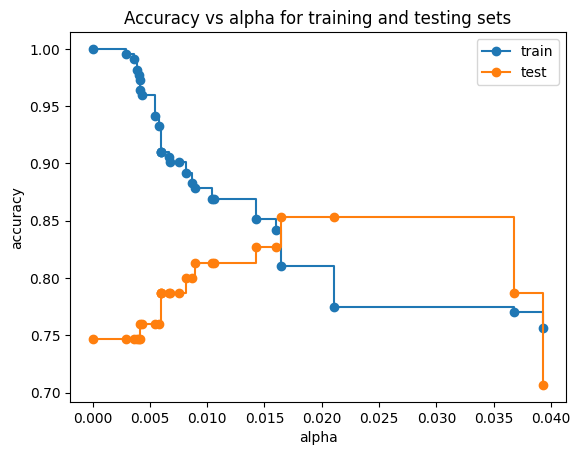

In [ ]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label= "train", drawstyle= "steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label= "test", drawstyle= "steps-post")
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the testing dataset hits its maximum value when alpha is about 0.016. After this value for alpha, the accuracy of the training dataset drops off and that suggets we should set ccp_alpha= 0.016.

PS: When we apply cost complexity pruning to a classification tree, values for alpha go from 0 to 1 because Gini scores go from 0 to 1.

Since there are many ways we could have divided the original dataset into training and testing datasets, how do we know we used the best **training dataset** and how do we know we used the best **testing dataset** ? Typically we answer this question with **10 fold cross validation**. So that's what we're goind to do nonw and we'll do it with the cross_val_score() function.

The graph we just drew suggested one value for alpha but another dataset mught suggest another optimal value.
First, let's demonstrate that different traioning and testing datasets result in trees with deifferent accuracies when we set ccp_alpha=0.016. We will do this by using the cross_val_score() function to generate different training and testing datasets and then train and test the tree with those datasets.

<Axes: xlabel='tree'>

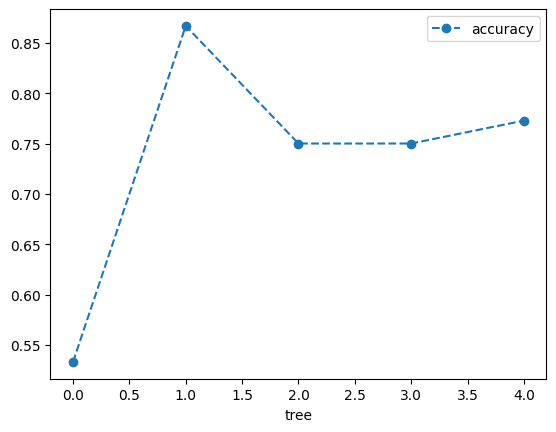

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha = 0.016)

##now use 5 fold cross validation create 5 different training and testing datasets that are then used to train and test
# the tree.
# PS: WE use 5-fold because we dont have tons of data..

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy' : scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

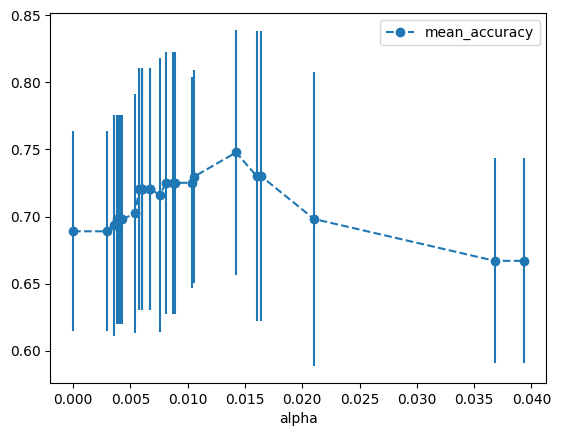

In [ ]:
import numpy as np
alpha_loop_values = []

for ccp_alpha in ccp_alphas :
  clf_dt = DecisionTreeClassifier(random_state= 0, ccp_alpha = ccp_alpha)
  scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

#Now we can draw a graph of the means and the std deviations of the scores for each candidate value for alpha

alpha_results = pd.DataFrame(alpha_loop_values, columns =['alpha', 'mean_accuracy','std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker ='o', linestyle='--')


Using cross validation, we can see that over all, instead of setting ccp_alpha=0.016 we need to set it to something closer to 0.014 we can find the exact value with:


In [ ]:
alpha_results [(alpha_results['alpha']> 0.014)
&
               (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
21,0.014225,0.747778,0.091395


Now let's store the ideal value for alpha so that we can use it to build the best tree

In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
&
                                (alpha_results['alpha'] < 0.015)] ['alpha']

ideal_ccp_alpha

21    0.014225
Name: alpha, dtype: float64

Python thins that ideal_ccp_alpha is a series which is a type of array. We can tell because when we printed ideal_ccp_alpha out, we got two bits of stuff. The first one was 20, which is the inex in the series, the second one, 0.014225 is the value we want.

In [ ]:
#convert ideal_ccp_alpha from a series to a float

ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

Now we have the ideal value of alpha so we can build our final classification tree.

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

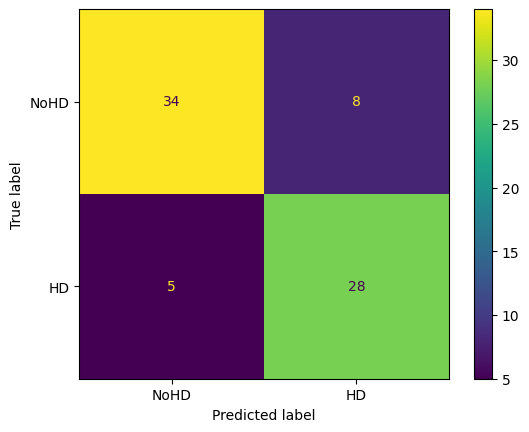

In [ ]:
predictions = clf_dt_pruned.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels =[0, 1] )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= ['NoHD', 'HD'])

disp.plot()
plt.show()

80% of not sick people have been correctly classified. 84% of sick people have been correctly classified. We didn't get better that much but the tree is very much less big.

[Text(0.4583333333333333, 0.875, 'ca_0.0 <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.25, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 Text(0.16666666666666666, 0.375, 'oldpeak <= 0.55\ngini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = No HD'),
 Text(0.08333333333333333, 0.125, 'gini = 0.401\nsamples = 18\nvalue = [13, 5]\nclass = No HD'),
 Text(0.25, 0.125, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]\nclass = Yes HD'),
 Text(0.3333333333333333, 0.375, 'gini = 0.126\nsamples = 59\nvalue = [4, 55]\nclass = Yes HD'),
 Text(0.6666666666666666, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.5, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.4166666666666667, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.5833333333333334, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Y

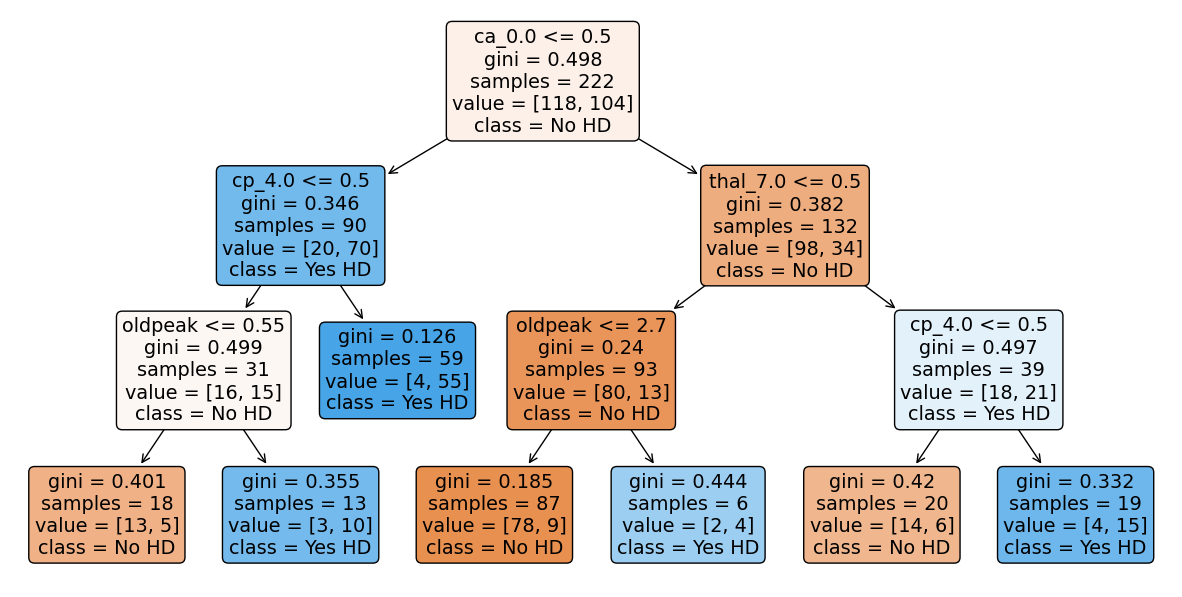

In [ ]:
plt.figure(figsize= (15, 7.5))
plot_tree(clf_dt_pruned,
          filled= True,
          rounded= True,
          class_names= ["No HD", "Yes HD"],
          feature_names =X_encoded.columns)

How to interpret the tree ?


*   The variable and the threshold for splitting the observations. For example, in the tree's root, we use **ca** to split hte observations; All observations with **ca<=0.5** fo to the left and all observations with **ca>0.5** go to the right.  
*   The nodes and the leaves are colored by the class. in this case **NO** is different shades of orange-ish and **YES** is different shades of blue. The darker the shade, the lower the **gini** score and that tells us how much the node or leaf is skewed towards one class.

